In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy

from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding

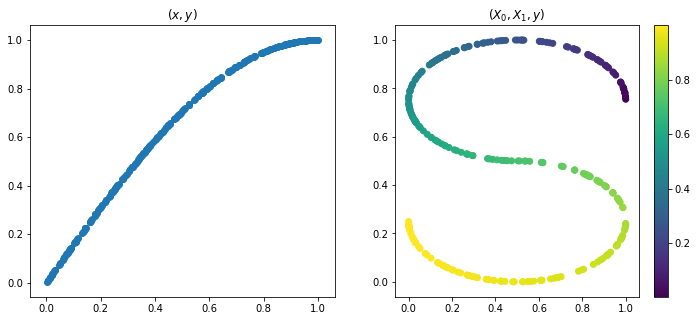

In [25]:
def get_real_data(num_samples):
    ''' Get some data in the 'true' space. In this case we have things distributed on [0, 1).
        Return (X, y).
    '''
    x = numpy.random.random(num_samples)
    y = numpy.sin(x * numpy.pi / 2)
    
    # TODO add a little noise?
    return x, y

    
def embed_features(x):                                                                                                                             
    ''' Given an input vector, apply a transformation to embed it in a higher dimensional space. '''                                               
    assert len(x.shape) == 1, 'Unsupported shape {}'.format(x.shape)                                                                               
                                                                                                                                                   
    # TODO add noise, optionally?                                                                                                                  
    new_X = numpy.zeros((x.shape[0], 2))                                                                                                           
                                                                                                                                                   
    # This is the true embedding transformation - it creates an S shape in (0, 1) box                                                              
    t = 3 * numpy.pi * (x - 0.5)                                                                                                                   
    new_X[:, 0] = (1 + numpy.sin(t)) / 2                                                                                                           
    new_X[:, 1] = (numpy.sign(t) * (numpy.cos(t) - 1) + 2) / 4                                                                                     
                                                                                                                                                   
    return new_X  

pyplot.figure(figsize=(12, 5))
pyplot.subplot(1, 2, 1)
num_samples = 300
x, y = get_real_data(num_samples)
pyplot.scatter(x, y);
pyplot.title('$(x, y)$')

X = embed_features(x)

pyplot.subplot(1, 2, 2)
pyplot.title('$(X_0, X_1, y)$')
pyplot.scatter(X[:, 0], X[:, 1], c=y);
pyplot.colorbar();

### Study manifold learning

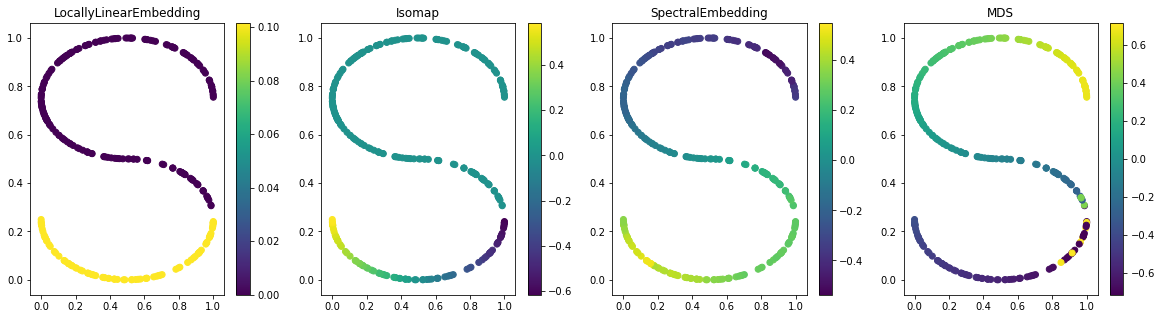

In [29]:
models = [
    LocallyLinearEmbedding(n_components=1, method='modified'),
    Isomap(n_components=1),
    # These can only be used with fit_transform
    SpectralEmbedding(n_components=1),
    MDS(n_components=1),
]

pyplot.figure(figsize=(20, 5))

for i, model in enumerate(models):
    # Suitable for models which only implement fit_transform
    t = model.fit_transform(X)
    
    # Preferred in all other cases...
    # model.fit(X)
    # X = _make_grid(100)
    # t = model.transform(X)
    
    pyplot.subplot(1, len(models), i + 1)
    pyplot.title(type(model).__name__)
    pyplot.scatter(X[:, 0], X[:, 1], c=t)
    pyplot.colorbar();